# Unsupervised Learning: Dimensionality Reduction using PCA

## 1. Introduction to Dimensionality Reduction
- **Purpose**:
  - Data Compression: Reduce dimensionality to save memory and computational resources.
  - Data Visualization: Simplify multi-dimensional datasets for better interpretability.

## 2. Motivation: Data Compression
### Visualizing reduction of 2D data to 1D

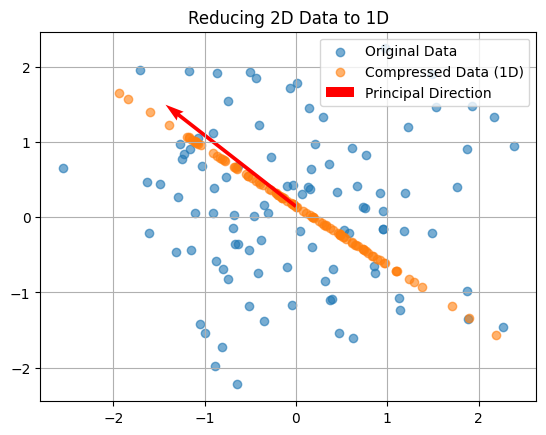

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Generate 2D data
np.random.seed(0)
X = np.random.randn(100, 2)

# Compute the principal direction
mean = np.mean(X, axis=0)
X_centered = X - mean
u, s, vh = np.linalg.svd(X_centered)
principal_axis = vh[0]

# Project data onto the principal axis (1D reduction)
X_projected = X_centered @ principal_axis[:, np.newaxis] @ principal_axis[np.newaxis, :]

# Plot original vs. compressed
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, label="Original Data")
plt.scatter(X_projected[:, 0] + mean[0], X_projected[:, 1] + mean[1], alpha=0.6, label="Compressed Data (1D)")
plt.quiver(mean[0], mean[1], principal_axis[0], principal_axis[1],
           color="red", scale=3, label="Principal Direction")
plt.title("Reducing 2D Data to 1D")
plt.legend()
plt.grid()
plt.show()


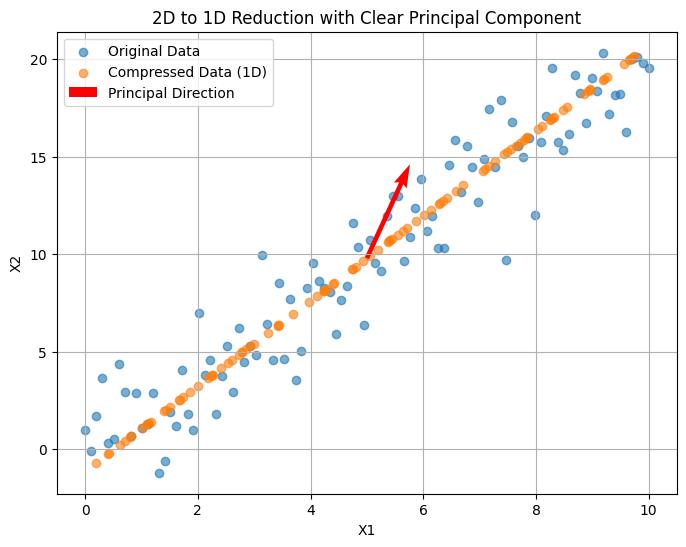

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D data with an obvious principal component
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.normal(0, 2, size=x.shape)  # Clear linear relationship with some noise
X = np.column_stack((x, y))

# Compute the principal direction
mean = np.mean(X, axis=0)
X_centered = X - mean
u, s, vh = np.linalg.svd(X_centered)
principal_axis = vh[0]

# Project data onto the principal axis (1D reduction)
X_projected = X_centered @ principal_axis[:, np.newaxis] @ principal_axis[np.newaxis, :]

# Plot original vs. compressed data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, label="Original Data")
plt.scatter(X_projected[:, 0] + mean[0], X_projected[:, 1] + mean[1], alpha=0.6, label="Compressed Data (1D)")
plt.quiver(mean[0], mean[1], principal_axis[0], principal_axis[1],
           color="red", scale=6, label="Principal Direction")
plt.title("2D to 1D Reduction with Clear Principal Component")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid()
plt.show()


## 3. PCA Problem Formulation
- Reduce from n-dimensions to k-dimensions while minimizing projection error.
- Use eigenvectors of the covariance matrix for dimensionality reduction.

## 4. PCA Algorithm Steps
### Applying PCA to reduce dimensions of 3D data to 2D

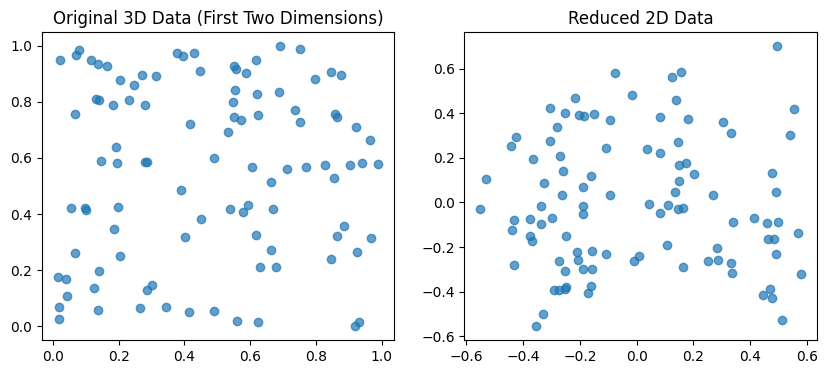

In [ ]:

from sklearn.decomposition import PCA

# Generate random 3D data
np.random.seed(1)
X = np.random.rand(100, 3)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualize original and reduced data
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.7)
ax[0].set_title("Original 3D Data (First Two Dimensions)")
ax[1].scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.7)
ax[1].set_title("Reduced 2D Data")
plt.show()


## 5. Choosing the Number of Principal Components
### Visualizing variance explained by PCA components

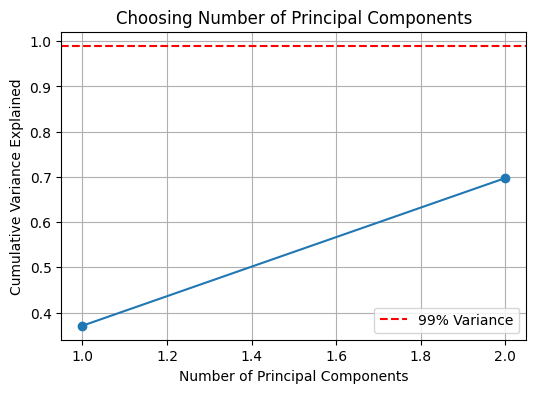

In [ ]:

# Visualizing variance explained by PCA components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.99, color='r', linestyle='--', label="99% Variance")
plt.title("Choosing Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend()
plt.grid()
plt.show()


## 6. Reconstruction from Compressed Representation
### Reconstructing data using top principal components

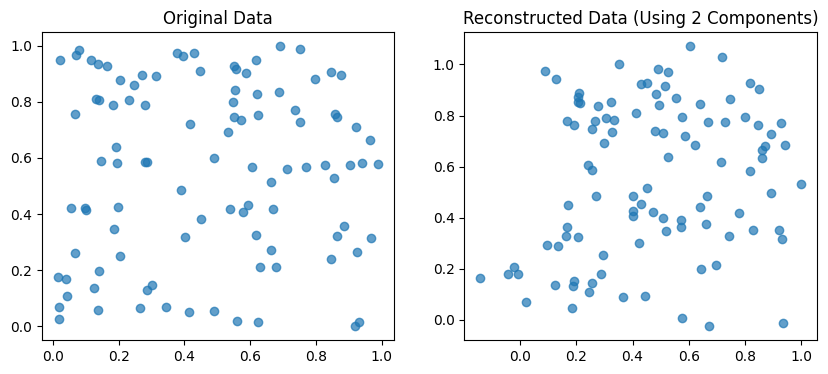

In [ ]:

# Reconstruct data using top principal components
X_reconstructed = pca.inverse_transform(X_reduced)

# Compare original vs reconstructed data
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.7)
ax[0].set_title("Original Data")
ax[1].scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.7)
ax[1].set_title("Reconstructed Data (Using 2 Components)")
plt.show()


## 7. Applications of PCA
### Reducing features in a machine learning task

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Train and evaluate logistic regression on reduced data
clf = LogisticRegression()
clf.fit(X_train_reduced, y_train)
y_pred = clf.predict(X_test_reduced)

print("Accuracy after PCA:", accuracy_score(y_test, y_pred))


Accuracy after PCA: 1.0
